# Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.8.2


# Исходные данные

In [ ]:
#Подключаю GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_bp = pd.read_excel("/content/drive/MyDrive/ВКР_Исаева ОВ/X_bp.xlsx",index_col=0)
df_bp

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                            1.857143       2030.000000   
1.0                            1.857143       2030.000000   
2.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0                738.736842                    30.000000   
1.0                738.736842                    50.000000   
2.0                738.736842                    49.900000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                           22.267857                100.000000   
1.0                           23.750000                284.615385   
2.0                           33.000000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                        210.000000                             70.000000   
1.0                        210.000000                             70.000000   
2.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  
0.0                       3000.000000               220.000000  
1.0                       3000.000000               220.000000  
2.0                       3000.000000               220.000000  
3.0                       3000.000000               220.000000  
4.0                       3000.000000               220.000000  
...                               ...                      ...  
1018.0                    2387.292495               125.007669  
1019.0                    2360.392784               117.730099  
1020.0                    2662.906040               236.606764  
1021.0                    2071.715856               197.126067  
1022.0                    2856.328932

In [ ]:
df_bp.drop(df_bp.index[0:23],inplace=True)
df_bp=df_bp.reset_index(drop=True)

In [ ]:
df_nup = pd.read_excel("/content/drive/MyDrive/ВКР_Исаева ОВ/X_nup.xlsx",index_col=0)
df_nup

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0.0                    0.0     4.000000          57.000000
1.0                    0.0     4.000000          60.000000
2.0                    0.0     4.000000          70.000000
3.0                    0.0     5.000000          47.000000
4.0                    0.0     5.000000          57.000000
...                    ...          ...                ...
1035.0                90.0     8.088111          47.759177
1036.0                90.0     7.619138          66.931932
1037.0                90.0     9.800926          72.858286
1038.0                90.0    10.079859          65.519479
1039.0                90.0     9.021043          66.920143

[1040 rows x 3 columns]

In [ ]:
df_nup.drop(df_nup.index[0:40],inplace=True)
df_nup=df_nup.reset_index(drop=True)

# Объединение данных в датасет

In [ ]:
df = df_bp.merge(df_nup, left_index=True,right_index=True, how='inner')
df
df = df_nup.join(df_bp,  how='inner')

# Предобработка и разверточный анализ данных

In [ ]:
#посмотрим, какая информация содержится в датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1000 non-null   float64
 1   Шаг нашивки                           1000 non-null   float64
 2   Плотность нашивки                     1000 non-null   float64
 3   Соотношение матрица-наполнитель       1000 non-null   float64
 4   Плотность, кг/м3                      1000 non-null   float64
 5   модуль упругости, ГПа                 1000 non-null   float64
 6   Количество отвердителя, м.%           1000 non-null   float64
 7   Содержание эпоксидных групп,%_2       1000 non-null   float64
 8   Температура вспышки, С_2              1000 non-null   float64
 9   Поверхностная плотность, г/м2         1000 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1000 non-null   float64
 11  Прочность при раст

In [ ]:
#посмотрим уникальность значений в колонках, выведем на экран последние 10 значений
for column in df.columns:
    print(f'Колонка {column}')
    print(sorted(df[column].unique())[-10:])

Колонка Угол нашивки, град
[0.0, 90.0]
Колонка Шаг нашивки
[13.3748547768973, 13.378772113231, 13.4849451024425, 13.5719207023593, 13.6539870540166, 13.732404403383, 14.0332153037961, 14.0513828180002, 14.3764512763632, 14.4405218753969]
Колонка Плотность нашивки
[85.6609961909375, 85.9871737934485, 86.0124270098611, 88.0724895050505, 88.8076471500205, 89.8766155103646, 92.0421393826707, 92.9634919477473, 98.2026027528147, 103.988901301494]
Колонка Соотношение матрица-наполнитель
[5.11078055270228, 5.12036847803355, 5.21044243868871, 5.25889457769596, 5.29584199270212, 5.3141436851035, 5.42513947440363, 5.45295943131032, 5.45556617827335, 5.59174159869754]
Колонка Плотность, кг/м3
[2158.79483589482, 2160.75143947764, 2161.56521646388, 2170.34236302043, 2172.24679646503, 2182.75182183283, 2184.49319952038, 2192.29763744164, 2192.73878348, 2207.77348061119]
Колонка модуль упругости, ГПа
[1511.68184145459, 1542.1684576617, 1543.02368299018, 1546.29088574472, 1572.09604227992, 1588.6772174

In [ ]:
#проверим данные на пропуски
df.isna().sum()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

In [ ]:
#вывод - пропусков нет

# Основные статистические характеристики, в том числе средние и медианные значения характеристик

In [ ]:
df.describe()

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
count         1000.000000  1000.000000        1000.000000   
mean            45.000000     6.911840          57.245335   
std             45.022517     2.557834          12.338871   
min              0.000000     0.037639          11.740126   
25%              0.000000     5.139108          49.970740   
50%             45.000000     6.913444          57.413594   
75%             90.000000     8.566744          65.107235   
max             90.000000    14.440522         103.988901   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1000.000000       1000.000000   
mean                          2.930612       1975.666791   
std                           0.913939         73.796817   
min                           0.389403       1731.764635   
25%                           2.318526       1924.203433   
50%                           2.907832       1977.574305   
75%                           3.552539       2021.159498   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1000.000000                  1000.000000   
mean              739.950520                   110.541116   
std               330.327013                    28.304470   
min                 2.436909                    17.740275   
25%               498.438068                    92.170589   
50%               741.148111                   110.162666   
75%               962.851423                   130.311975   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1000.000000               1000.000000   
mean                         22.243850                285.911287   
std                           2.406999                 40.962756   
min                          14.254985                160.255843   
25%                          20.558296                258.539199   
50%                          22.230761                285.853960   
75%                          23.982115                313.581449   
max                          28.955094                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1000.000000                           1000.000000   
mean                      483.024665                             73.328462   
std                       280.811736                              3.119584   
min                         0.603740                             64.054061   
25%                       268.057473                             71.301753   
50%                       452.972263                             73.247594   
75%                       694.210382                             75.379739   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                    1000.000000              1000.000000  
mean                     2467.184290               218.386876  
std                       485.624616                59.819777  
min                      1036.856605                33.803026  
25%                      2143.834592               179.190489  
50%                      2461.249253               217.277006  
75%                      2760.163022               257.495647  
max                      3848.436732               414.590628

In [ ]:
df.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

# Построение гистограмм

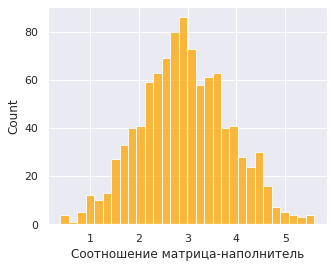

In [ ]:
sns.histplot(df['Соотношение матрица-наполнитель'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})


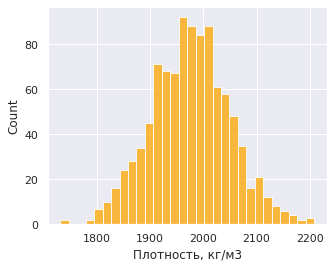

In [ ]:
sns.histplot(df['Плотность, кг/м3'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

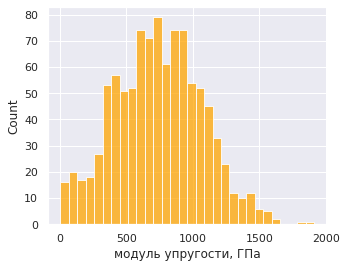

In [ ]:
sns.histplot(df['модуль упругости, ГПа'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

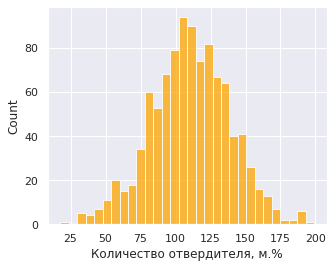

In [ ]:
sns.histplot(df['Количество отвердителя, м.%'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

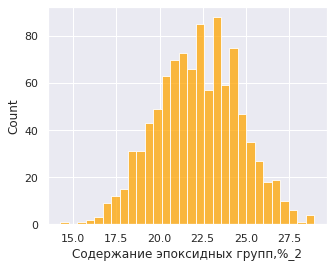

In [ ]:
sns.histplot(df['Содержание эпоксидных групп,%_2'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

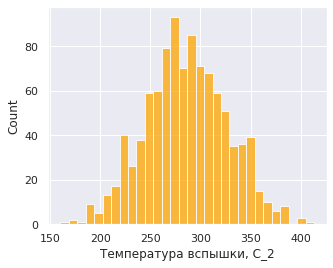

In [ ]:
sns.histplot(df['Температура вспышки, С_2'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

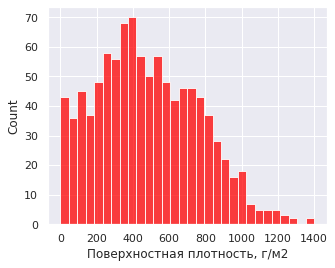

In [ ]:
sns.histplot(df['Поверхностная плотность, г/м2'], kde=False, bins=30, color='red')
sns.set(rc={'figure.figsize':(5,4)})

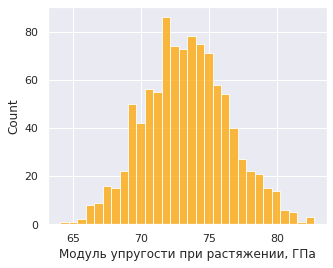

In [ ]:
sns.histplot(df['Модуль упругости при растяжении, ГПа'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

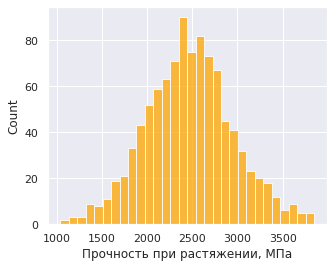

In [ ]:
sns.histplot(df['Прочность при растяжении, МПа'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

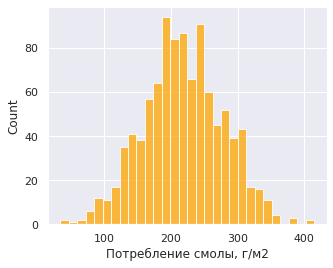

In [ ]:
sns.histplot(df['Потребление смолы, г/м2'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

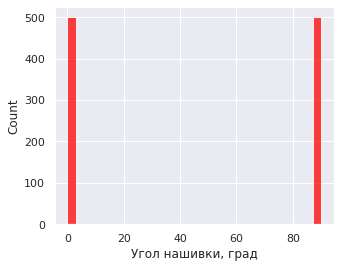

In [ ]:
sns.histplot(df['Угол нашивки, град'], kde=False, bins=30, color='red')
sns.set(rc={'figure.figsize':(5,4)})

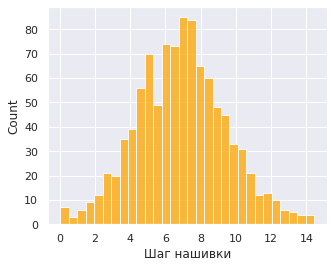

In [ ]:
sns.histplot(df['Шаг нашивки'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

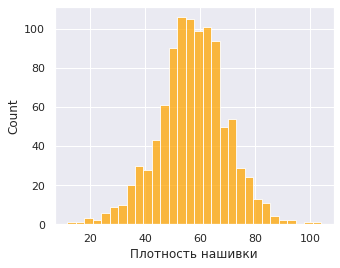

In [ ]:
sns.histplot(df['Плотность нашивки'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

Для большинства характеристик распределение близко к нормальному

Исключение составляют:

- Поверхностная плотность, г/м2 - нормальное распределение со смещением вправо. Что свидетельствует о большем количестве измерений с меньшим показателем поверхностной алотности

- Угол нашивки, град - дискретное распределение, так как колонка содержит всего два уникальных значения



# Построение диаграммы "ящик с усами"

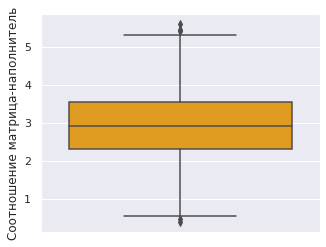

In [ ]:
sns.boxplot(y='Соотношение матрица-наполнитель', data=df, color='orange')

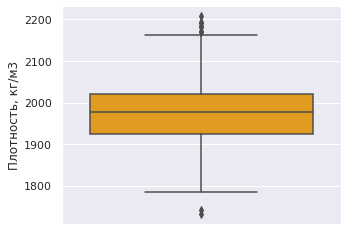

In [ ]:
sns.boxplot(y='Плотность, кг/м3', data=df, color='orange')

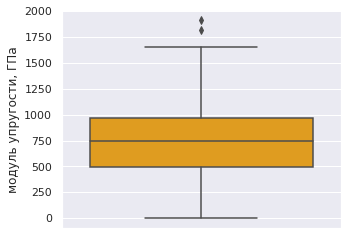

In [ ]:
sns.boxplot(y='модуль упругости, ГПа', data=df, color='orange')

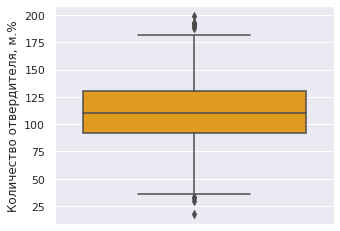

In [ ]:
sns.boxplot(y='Количество отвердителя, м.%', data=df, color='orange')

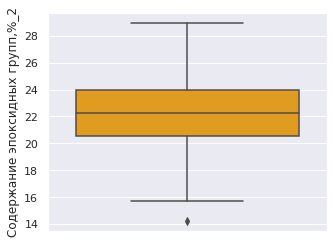

In [ ]:
sns.boxplot(y='Содержание эпоксидных групп,%_2', data=df, color='orange')

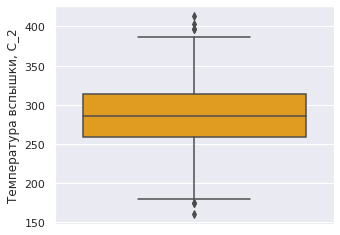

In [ ]:
sns.boxplot(y='Температура вспышки, С_2', data=df, color='orange')

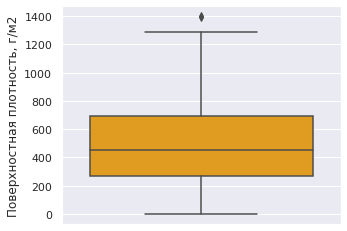

In [ ]:
sns.boxplot(y='Поверхностная плотность, г/м2', data=df, color='orange')

Наблюдается смещение в сторону малых значений

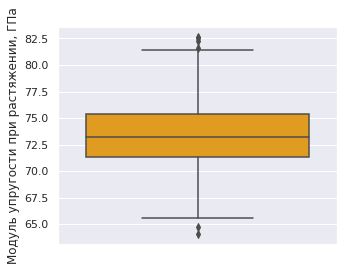

In [ ]:
sns.boxplot(y='Модуль упругости при растяжении, ГПа', data=df, color='orange')

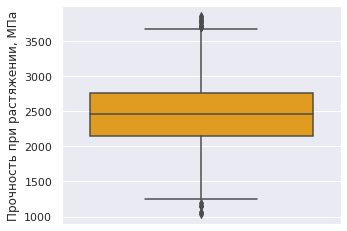

In [ ]:
sns.boxplot(y='Прочность при растяжении, МПа', data=df, color='orange')

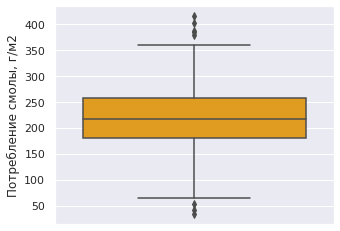

In [ ]:
sns.boxplot(y='Потребление смолы, г/м2', data=df, color='orange')

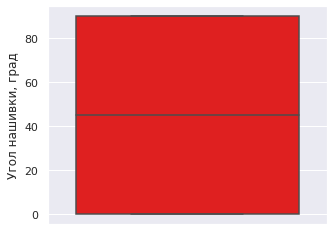

In [ ]:
sns.boxplot(y='Угол нашивки, град', data=df, color='red')

Дискретная величина, график не показателен

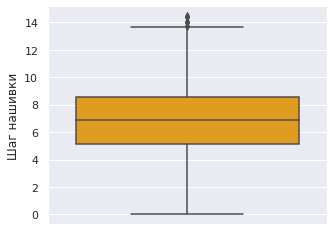

In [ ]:
sns.boxplot(y='Шаг нашивки', data=df, color='orange')

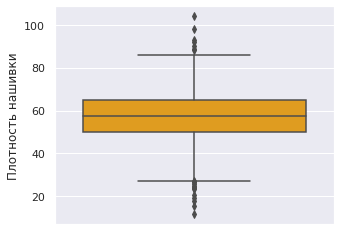

In [ ]:
sns.boxplot(y='Плотность нашивки', data=df, color='orange')

Выбросы наблюдаются по всем характеристикам, кроме угла нашивки.

# Построим попарные графики рассеяния точек

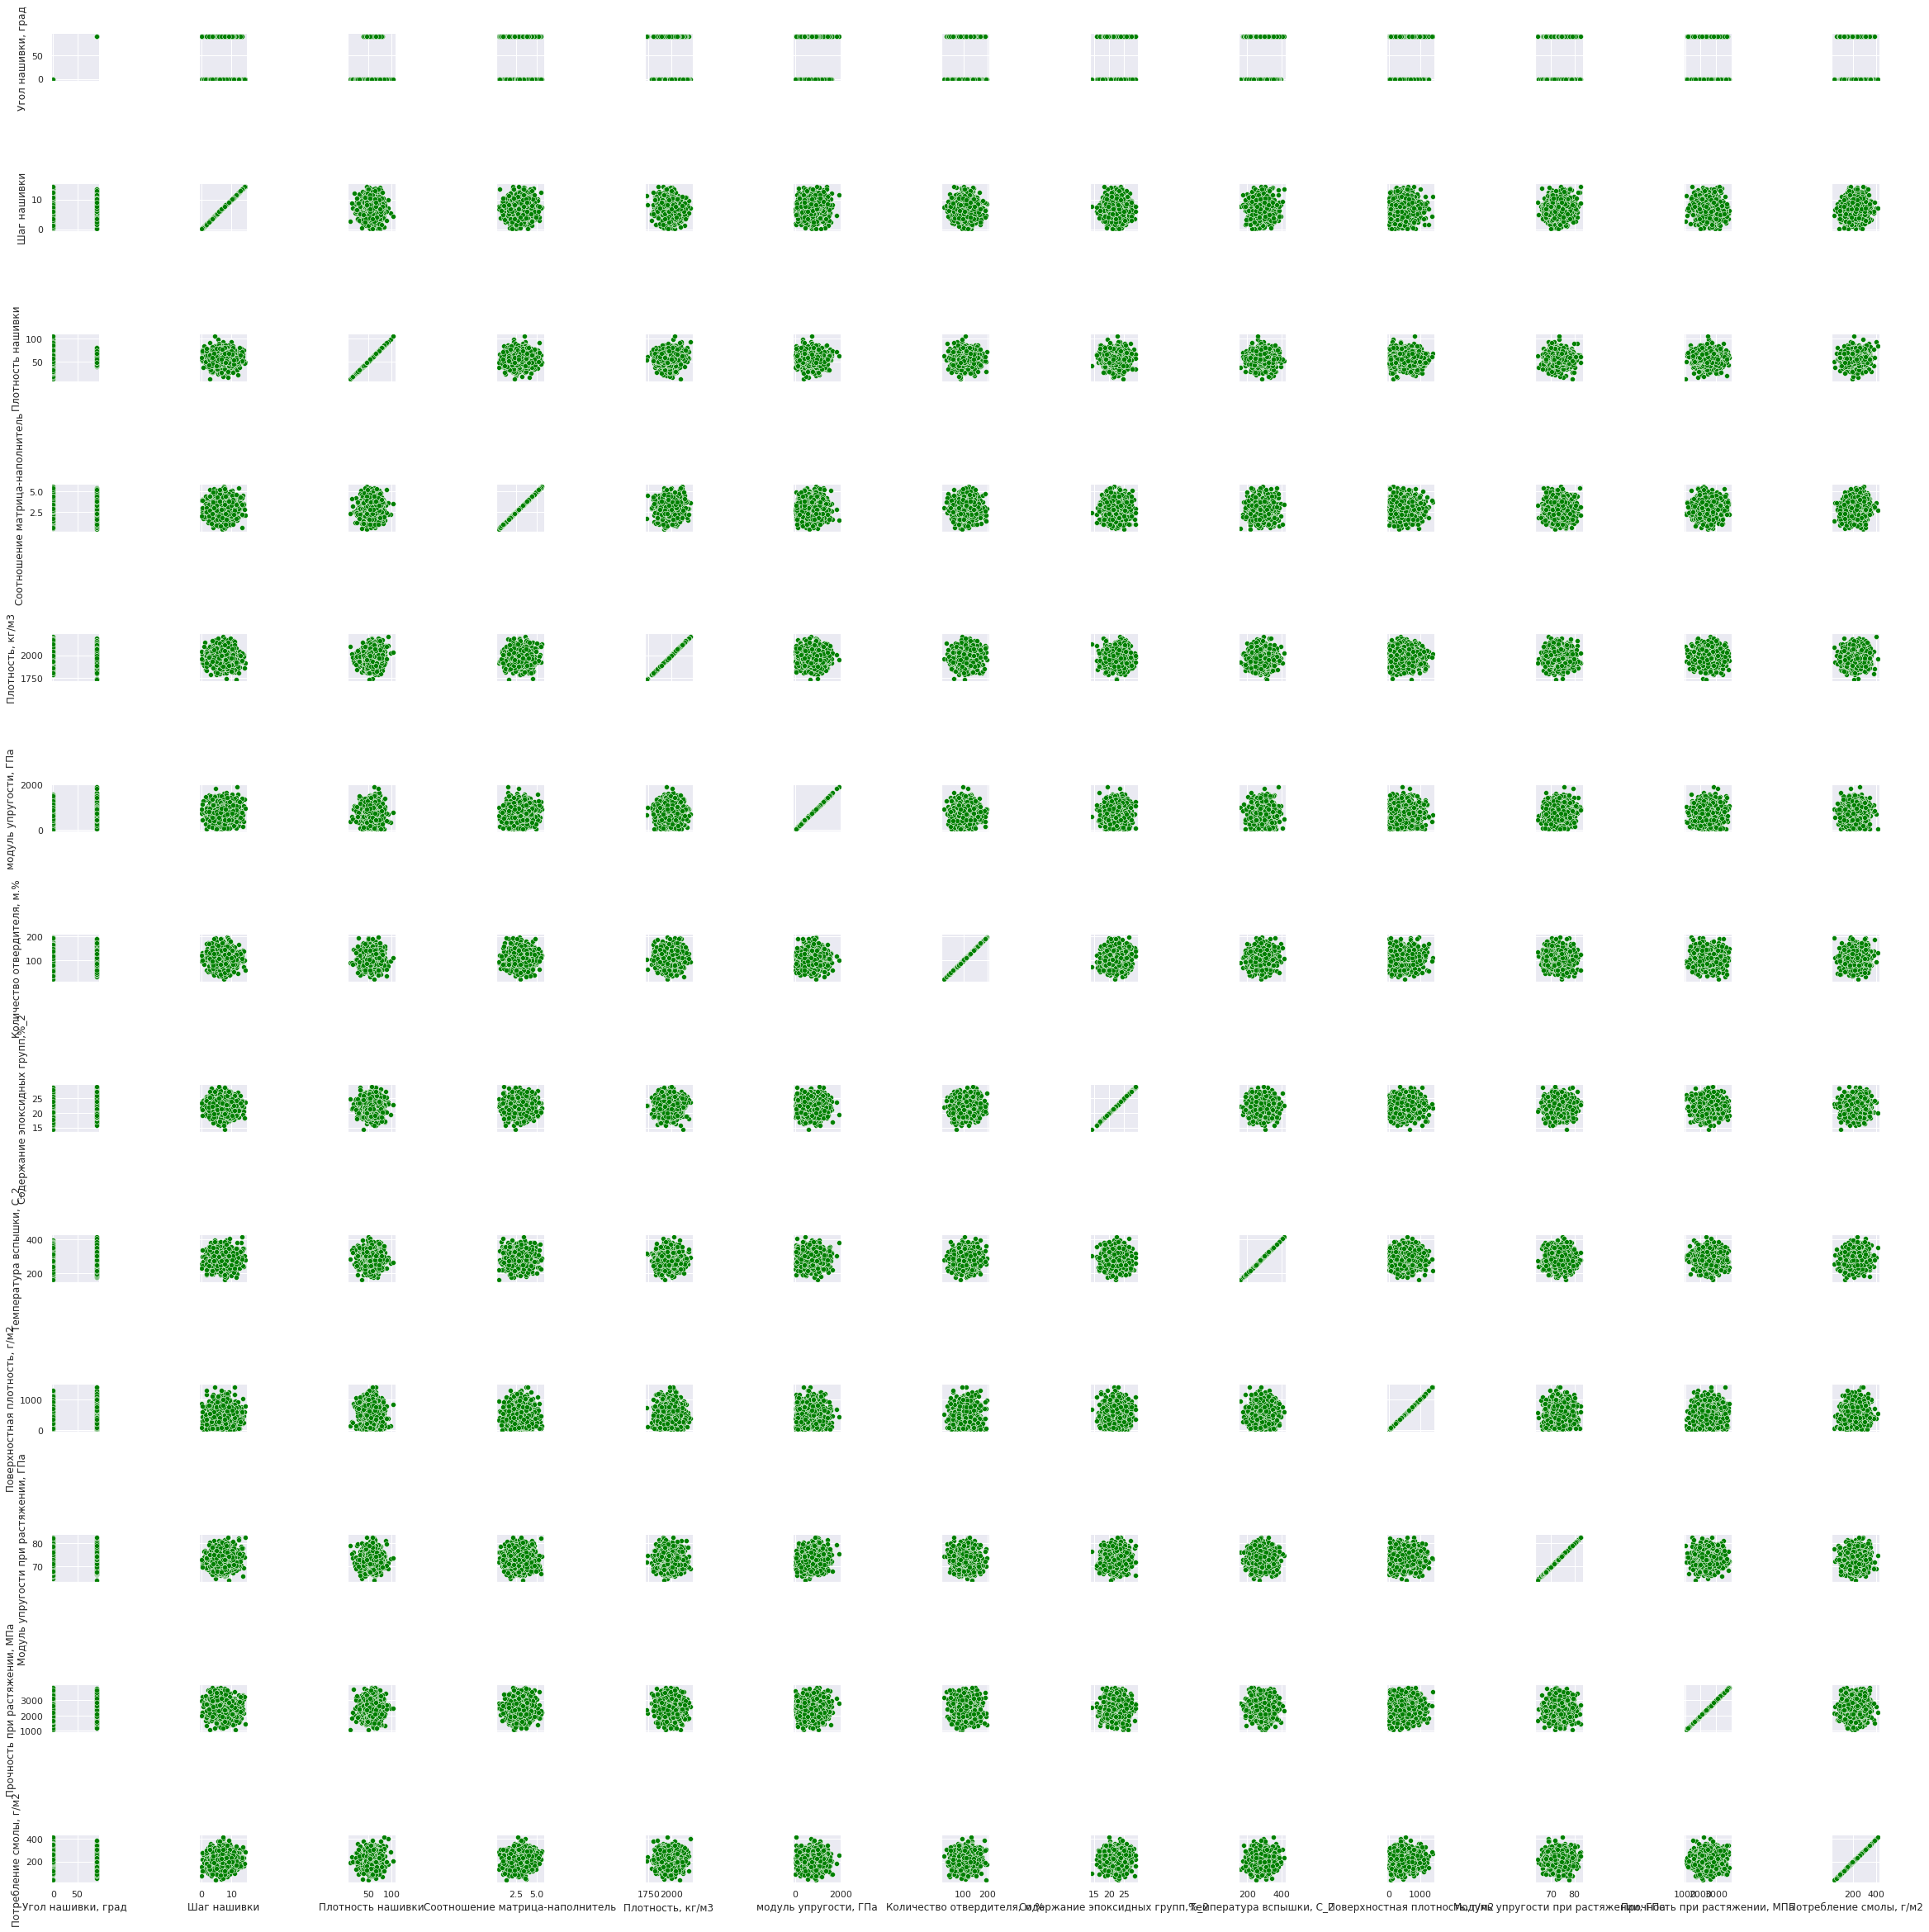

In [ ]:
columns = df.columns
g = sns.PairGrid(df[columns])
g.map(sns.scatterplot, color ='green')

Графики показывают отсутствие зависимости между переменными датасета.

# Исследование датасета. Применение коэффициента корреляции

In [ ]:
df.corr()

Угол нашивки, град  Шаг нашивки  \
Угол нашивки, град                              1.000000     0.027593   
Шаг нашивки                                     0.027593     1.000000   
Плотность нашивки                               0.114680    -0.002120   
Соотношение матрица-наполнитель                -0.017648     0.003872   
Плотность, кг/м3                               -0.063085    -0.059891   
модуль упругости, ГПа                          -0.036682     0.023334   
Количество отвердителя, м.%                     0.027478    -0.040893   
Содержание эпоксидных групп,%_2                -0.010491    -0.006281   
Температура вспышки, С_2                        0.006371     0.013975   
Поверхностная плотность, г/м2                   0.028886    -0.010481   
Модуль упругости при растяжении, ГПа            0.013306     0.038564   
Прочность при растяжении, МПа                   0.027160    -0.063203   
Потребление смолы, г/м2                        -0.000349     0.016095   

                                      Плотность нашивки  \
Угол нашивки, град                             0.114680   
Шаг нашивки                                   -0.002120   
Плотность нашивки                              1.000000   
Соотношение матрица-наполнитель                0.047208   
Плотность, кг/м3                               0.034952   
модуль упругости, ГПа                         -0.014098   
Количество отвердителя, м.%                   -0.001520   
Содержание эпоксидных групп,%_2               -0.041274   
Температура вспышки, С_2                      -0.017846   
Поверхностная плотность, г/м2                 -0.005347   
Модуль упругости при растяжении, ГПа           0.015600   
Прочность при растяжении, МПа                 -0.014026   
Потребление смолы, г/м2                        0.014545   

                                      Соотношение матрица-наполнитель  \
Угол нашивки, град                                          -0.017648   
Шаг нашивки                                                  0.003872   
Плотность нашивки                                            0.047208   
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.011033   
модуль упругости, ГПа                                        0.032246   
Количество отвердителя, м.%                                 -0.017575   
Содержание эпоксидных групп,%_2                              0.027885   
Температура вспышки, С_2                                    -0.011712   
Поверхностная плотность, г/м2                               -0.011906   
Модуль упругости при растяжении, ГПа                        -0.017502   
Прочность при растяжении, МПа                                0.036288   
Потребление смолы, г/м2                                      0.078841   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Угол нашивки, град                           -0.063085              -0.036682   
Шаг нашивки                                  -0.059891               0.023334   
Плотность нашивки                             0.034952              -0.014098   
Соотношение матрица-наполнитель               0.011033               0.032246   
Плотность, кг/м3                              1.000000              -0.017544   
модуль упругости, ГПа                        -0.017544               1.000000   
Количество отвердителя, м.%                  -0.032137               0.023490   
Содержание эпоксидных групп,%_2              -0.011680              -0.006186   
Температура вспышки, С_2                     -0.018260               0.031181   
Поверхностная плотность, г/м2                 0.038236              -0.017841   
Модуль упругости при растяжении, ГПа         -0.020699               0.014482   
Прочность при растяжении, МПа                -0.074165               0.048217   
Потребление смолы, г/м2                      -0.027946              -0.007369   

                              

# Построим тепловую карту коэффициентов корреляции

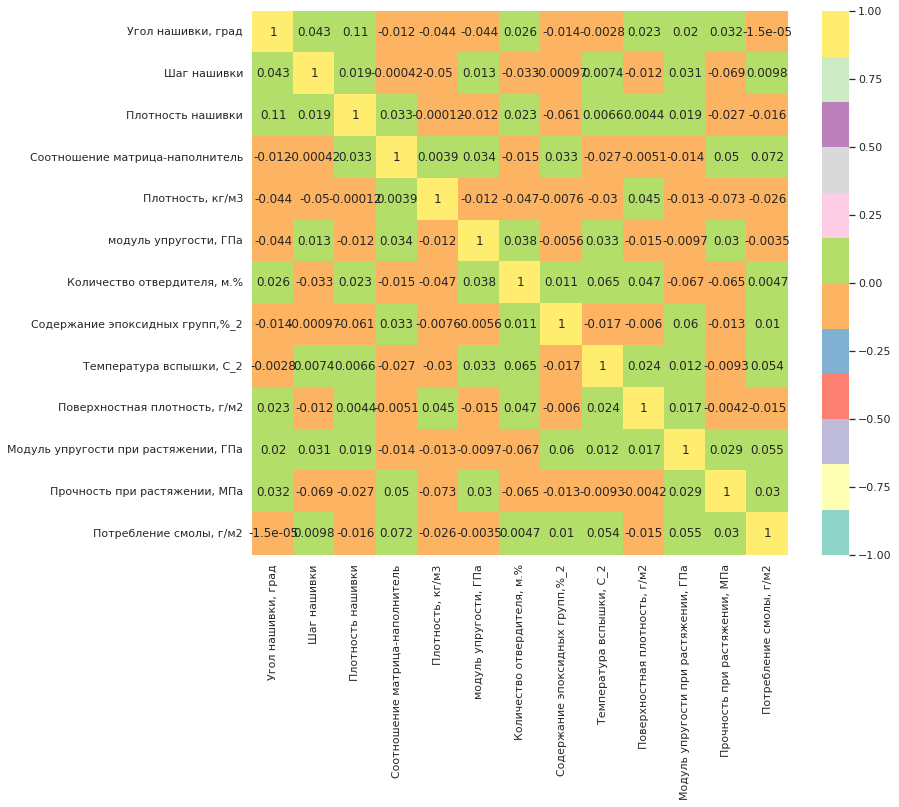

In [ ]:
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'Set3')

Все полученные коэффициенты корреляции находятся в промежутке значений от - 0,25 до 0,25.
Вывод: исходный датасет был предварительно обработан и переменные являются независимыми.

# Предобработка данных и удаление выбросов

In [ ]:
for column in df.columns:
    q75,q25 = np.percentile(df.loc[:,column],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[column] < min,column] = np.nan
    df.loc[df[column] > max,column] = np.nan

In [ ]:
df.isnull().sum()

Угол нашивки, град                       0
Шаг нашивки                              5
Плотность нашивки                       20
Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             11
Содержание эпоксидных групп,%_2          1
Температура вспышки, С_2                 7
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           15
Потребление смолы, г/м2                  8
dtype: int64

Количество выбросов говорит о их незначительности, поэтому их можно удалить из датасета

In [ ]:
df_used = df.dropna(axis = 0)

# Определение размера датасета после удаления выбросов и проверка наличия пропусков
print("Размер датасета после удаления выбросов и проверка наличия пропусков: \n",
      "\nКоличество строк в очищенном датасете: ", df_used.shape[0], 
      "\nКоличество столбцов (переменных) в очищенном датасете: ", df_used.shape[1],
      "\nКоличество пропусков в данных очищенного датасета: ", df_used.isna().sum().sum())

Размер датасета после удаления выбросов и проверка наличия пропусков: 
 
Количество строк в очищенном датасете:  918 
Количество столбцов (переменных) в очищенном датасете:  13 
Количество пропусков в данных очищенного датасета:  0


# Новые основные статистические характеристика датасета

In [ ]:
df_used.describe()

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
count          918.000000   918.000000         918.000000   
mean            46.372549     6.839158          57.481572   
std             45.003581     2.527857          11.357524   
min              0.000000     0.037639          27.272928   
25%              0.000000     5.081732          50.275385   
50%             90.000000     6.862404          57.471971   
75%             90.000000     8.499907          65.094083   
max             90.000000    13.653987          86.012427   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       918.000000        918.000000   
mean                          2.931808       1973.573912   
std                           0.896233         70.700233   
min                           0.547391       1784.482245   
25%                           2.339031       1923.774940   
50%                           2.908811       1976.572096   
75%                           3.550303       2019.594439   
max                           5.314144       2161.565216   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             918.000000                   918.000000   
mean              737.781357                   110.810569   
std               328.584201                    27.124289   
min                 2.436909                    35.599697   
25%               498.275517                    92.557414   
50%               733.016158                   110.589285   
75%               963.005895                   130.404874   
max              1649.415706                   181.828448   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       918.000000                918.000000   
mean                         22.249129                285.597958   
std                           2.415487                 39.937888   
min                          15.695894                179.374391   
25%                          20.554570                258.469516   
50%                          22.230545                285.853960   
75%                          23.994431                313.069462   
max                          28.955094                386.067992   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     918.000000                            918.000000   
mean                      484.101182                             73.311881   
std                       278.715166                              3.044495   
min                         0.603740                             65.553336   
25%                       270.651546                             71.225212   
50%                       457.732246                             73.247594   
75%                       696.010589                             75.365124   
max                      1291.340115                             81.417126   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                     918.000000               918.000000  
mean                     2459.931673               217.786977  
std                       454.081763                57.811632  
min                      1250.392802                63.685698  
25%                      2148.175736               178.664754  
50%                      2452.346918               216.759171  
75%                      2751.233766               256.995883  
max                      3660.450210               359.052220

Наблюдаем уменьшение количества строк датасета. Датасет очищен от выбросов
Попробуем выделить наиболее весомые признаки датасета при помощи факторного анализа

Обратимся к методам функционального анализа главных компонент для поиска скрытых факторов влияющих на свойства композита

In [ ]:
from sklearn.decomposition import PCA


Определим вклад влияния 90% факторов

In [ ]:
pca = PCA(n_components=.9)
pca.fit(df_used)
print(pca.explained_variance_ratio_)

[0.51000518 0.26721079 0.19123741]


Можно сделать вывод, что влияние очень слабое. Проведем анализ с целью определения весов характеристик датасета для первых пяти факторов влияния последовательно добавляя по одному фактору

In [ ]:
print (pca.components_)

[[ 0.26780968  0.03173131  0.40821137 -0.27922658  0.36167634 -0.2094252
   0.14034121 -0.24367524 -0.0873967   0.29010969 -0.17876222 -0.44092024
  -0.33280134]
 [-0.55494511 -0.38428461 -0.41492236 -0.05877433  0.39442423  0.06662678
  -0.01220987  0.11242442 -0.09868479  0.08940532 -0.3363619  -0.09118701
  -0.23824765]
 [ 0.02283147  0.1557046  -0.13132783 -0.19869033  0.08366996 -0.37791237
  -0.61931367  0.12455585 -0.49969445 -0.09221475  0.28885207  0.05262759
  -0.15882276]
 [ 0.16671306 -0.30610099  0.01170717 -0.33812032 -0.39725064  0.01537153
   0.06453682 -0.28304804 -0.1431952  -0.32913471 -0.31461437  0.37955776
  -0.38709195]
 [ 0.10879061 -0.46408801  0.16934411  0.25047325  0.22529655 -0.13093266
  -0.21233689 -0.32237561 -0.02286892  0.42623299  0.06956395  0.47765618
   0.22195865]
 [ 0.11116554 -0.19093537 -0.33524301 -0.51941249 -0.13135117 -0.35920987
   0.18076818  0.20061187  0.41499877  0.30204972  0.28618905  0.04581317
   0.04837929]
 [ 0.31083984 -0.070327

In [ ]:
print ('Explained variance by component: %s' % pca.explained_variance_ratio_)

Explained variance by component: [0.51000518 0.26721079 0.19123741]


In [ ]:
pca.singular_values_

array([13757.26659208,  9957.99379647,  8424.2508072 ])

In [ ]:
pca.explained_variance_ratio_

array([0.51000518, 0.26721079, 0.19123741])

In [ ]:
m = pca.transform(df_used)

In [ ]:
m

array([[-142.32786315,  384.3186892 ,  111.73479781],
       [-161.03219215,  -42.60816187,   62.6578808 ],
       [ -19.72135658,  131.46703441, -320.04020562],
       ...,
       [-187.60092382, -353.33188872,  223.70241092],
       [ 390.72480247,    3.12466339,  156.31356835],
       [-381.58283013, -362.0248613 ,  242.34517625]])

In [ ]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)
fa.fit(df_used)

FactorAnalysis(n_components=2)

In [ ]:
pd.DataFrame(fa.components_, columns=df.columns)

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0           -0.831158     0.174151           0.477568   
1           -1.959662     0.010382           0.061524   

   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                        -0.037332          5.880217              -8.446005   
1                         0.038047         -0.051347             327.098372   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     1.282794                         0.020329   
1                     1.223249                        -0.004780   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.251286                       2.751160   
1                  1.510154                      -9.464301   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                             -0.080392                    -453.827984   
1                             -0.011666                      -0.044924   

   Потребление смолы, г/м2  
0                -1.117011  
1                -0.416404

Для двух факторов: Выделить наименование и смысл нового фактора сложно. Но можно увидеть высокие доли характеристик внутри факторов:
модуль упругости, ГПа,
Температура вспышки, С_2
Плотность нашивки

In [ ]:
fa = FactorAnalysis(n_components=3)
fa.fit(df_used)

FactorAnalysis(n_components=3)

In [ ]:
pd.DataFrame(fa.components_, columns=df.columns)

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0            0.464609    -0.169282          -0.459367   
1           -2.080349     0.041831           0.144703   
2            0.974206    -0.046909           0.101787   

   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.043441         -5.819123              66.928159   
1                         0.030486          0.942318             321.488246   
2                         0.013513          5.368485               3.843076   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                    -1.048462                        -0.020746   
1                     1.418735                        -0.000816   
2                     0.861717                        -0.024665   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.017045                      -5.667792   
1                  1.514489                     -11.852031   
2                  0.950882                     278.247697   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                              0.076868                     446.526490   
1                             -0.026105                     -81.095650   
2                              0.037879                       1.155676   

   Потребление смолы, г/м2  
0                 1.028131  
1                -0.601389  
2                -0.788434

Для трех факторов: Выделить наименование и смысл нового фактора сложно. Но можно увидеть высокие доли характеристик внутри факторов:
Количество отвердителя, м.%
Плотность, кг/м3
Плотность нашивки

In [ ]:
fa = FactorAnalysis(n_components=4)
fa.fit(df_used)

FactorAnalysis(n_components=4)

In [ ]:
pd.DataFrame(fa.components_, columns=df.columns)

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0           -0.779327     0.173566           0.476594   
1           -2.058195     0.018982           0.062890   
2            0.805285    -0.046038           0.106073   
3           -1.922771    -0.117951           0.174338   

   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                        -0.038138          5.919942             -16.177310   
1                         0.035582         -0.425356             326.485724   
2                         0.016688          5.356339              31.531071   
3                        -0.000104         70.091181              -0.001957   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     1.258536                         0.020291   
1                     1.161977                        -0.001929   
2                     0.958901                        -0.024981   
3                    -1.145542                        -0.011836   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.221115                       4.603579   
1                  1.413332                     -36.002442   
2                  1.072838                     276.186637   
3                 -1.071407                      -0.090351   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                             -0.079881                    -453.698446   
1                             -0.017014                     -10.941579   
2                              0.036799                       1.617064   
3                             -0.058751                       0.056296   

   Потребление смолы, г/м2  
0                -1.111588  
1                -0.366666  
2                -0.819266  
3                -1.188502

Для четырех факторов: Выделить наименование и смысл нового фактора сложно. Но можно увидеть высокие доли характеристик внутри факторов:
Количество отвердителя, м.%
Плотность, кг/м3
Плотность нашивки
Угол нашивки, град

In [ ]:
fa = FactorAnalysis(n_components=5)
fa.fit(df_used)

FactorAnalysis(n_components=5)

In [ ]:
pd.DataFrame(fa.components_, columns=df.columns)

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0           -0.780308     0.173546           0.476656   
1           -2.059473     0.019022           0.062533   
2            0.800295    -0.046068           0.106280   
3           -1.918942    -0.118280           0.176838   
4            0.137156    -0.025058           0.156145   

   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                        -0.038129          5.933775             -16.075696   
1                         0.035560         -0.439825             326.428095   
2                         0.016754          5.391004              32.173214   
3                        -0.001261         70.148494              -0.005464   
4                        -0.068038         -1.197085              -0.009138   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     1.258701                         0.020287   
1                     1.159737                        -0.001885   
2                     0.960560                        -0.024991   
3                    -1.144733                        -0.011687   
4                     0.030694                         0.007084   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.221301                       4.601495   
1                  1.411134                     -36.546599   
2                  1.074907                     276.115124   
3                 -1.108359                      -0.233082   
4                 -2.209523                      -0.014657   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                             -0.079902                    -453.701733   
1                             -0.017064                     -10.804995   
2                              0.036728                       1.610732   
3                             -0.061214                       0.144503   
4                             -0.148000                       0.012784   

   Потребление смолы, г/м2  
0                -1.113880  
1                -0.366007  
2                -0.824589  
3                -2.169406  
4               -57.639356

Для пяти факторов: Выделить наименование и смысл нового фактора сложно. Но можно увидеть высокие доли характеристик внутри факторов:
Количество отвердителя, м.%
Плотность, кг/м3
Плотность нашивки
Угол нашивки, град
Потребление смолы, г/м2

Вывод: возможно характеристики:
Количество отвердителя,
Плотность нашивки,
Плотность,
Угол нашивки,
Потребление смолы
являются наиболее существенными для построения будущих моделей

# Нормализация данных

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [ ]:
mms = MinMaxScaler()
df_used_norm = pd.DataFrame(mms.fit_transform(df_used), columns=df_used.columns, index=df_used.index)

In [ ]:
df_used_norm.describe()

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
count          918.000000   918.000000         918.000000   
mean             0.515251     0.499511           0.514282   
std              0.500040     0.185649           0.193354   
min              0.000000     0.000000           0.000000   
25%              0.000000     0.370444           0.391601   
50%              1.000000     0.501218           0.514118   
75%              1.000000     0.621479           0.643879   
max              1.000000     1.000000           1.000000   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       918.000000        918.000000   
mean                          0.500218          0.501459   
std                           0.188017          0.187493   
min                           0.000000          0.000000   
25%                           0.375862          0.369395   
50%                           0.495394          0.509410   
75%                           0.629970          0.623503   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             918.000000                   918.000000   
mean                0.446481                     0.514337   
std                 0.199507                     0.185492   
min                 0.000000                     0.000000   
25%                 0.301059                     0.389511   
50%                 0.443588                     0.512824   
75%                 0.583231                     0.648335   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       918.000000                918.000000   
mean                          0.494241                  0.513918   
std                           0.182174                  0.193223   
min                           0.000000                  0.000000   
25%                           0.366438                  0.382668   
50%                           0.492839                  0.515157   
75%                           0.625870                  0.646827   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     918.000000                            918.000000   
mean                        0.374590                              0.489073   
std                         0.215935                              0.191915   
min                         0.000000                              0.000000   
25%                         0.209220                              0.357536   
50%                         0.354161                              0.485020   
75%                         0.538768                              0.618502   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                     918.000000               918.000000  
mean                        0.501871                 0.521729  
std                         0.188411                 0.195728  
min                         0.000000                 0.000000  
25%                         0.372515                 0.389276  
50%                         0.498724                 0.518249  
75%                         0.622741                 0.654476  
max                         1.000000                 1.000000

# Модель для прогноза модуля упругости при растяжении

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Model_choice = pd.DataFrame(columns=['Model', 'MAE', 'R squared'])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df_used_norm.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

Выделим из датасета прогнозируемую (зависимую) переменную. И разделим выборку на обучающую и тестовую выборки, в соответствии с условием задачи 70% (на обучение) /30% (на тестирование)

In [ ]:
X = df_used_norm.drop('Модуль упругости при растяжении, ГПа', axis=1)
y = df_used_norm['Модуль упругости при растяжении, ГПа']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 642
Размер тестовой выборки: 276


# Линейная регрессия


In [ ]:
%%time
model_LN_1 = LinearRegression()
model_LN_1.fit(X_train, y_train)
y_pred = model_LN_1.predict(X_test)

CPU times: user 7.09 ms, sys: 1.02 ms, total: 8.11 ms
Wall time: 12.3 ms


# Случайный лес

In [ ]:
%%time
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [20, 40, 60],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_

CPU times: user 33.6 s, sys: 173 ms, total: 33.8 s
Wall time: 35.1 s


In [ ]:
model_RFR_1 = GSCV.best_estimator_

In [ ]:
%%time
model_RFR_1.fit(X_train, y_train)

CPU times: user 63.7 ms, sys: 3.01 ms, total: 66.7 ms
Wall time: 67.5 ms


RandomForestRegressor(max_depth=4, n_estimators=20, random_state=42)

In [ ]:
model_RFR_1.predict(X_test)

array([0.52504916, 0.52238962, 0.53415716, 0.47257244, 0.5265279 ,
       0.50133823, 0.41250332, 0.44438064, 0.46238534, 0.52419361,
       0.44468186, 0.51157949, 0.49454257, 0.46850506, 0.51394547,
       0.45858885, 0.49255357, 0.49369718, 0.48056956, 0.43583243,
       0.53420872, 0.43342829, 0.46876224, 0.51411354, 0.50476197,
       0.51901624, 0.53628629, 0.53946828, 0.48605356, 0.48573294,
       0.44512847, 0.48940845, 0.49531701, 0.52370905, 0.49925357,
       0.36959424, 0.5324691 , 0.49629715, 0.5054188 , 0.51698944,
       0.44400381, 0.53298394, 0.44164623, 0.51835939, 0.43287886,
       0.48504135, 0.48434647, 0.48805966, 0.51391887, 0.44251607,
       0.5077491 , 0.52044893, 0.42336162, 0.54671991, 0.53595333,
       0.48932006, 0.43142236, 0.40739528, 0.47380238, 0.44067551,
       0.4950137 , 0.44756254, 0.4925212 , 0.51770176, 0.45319057,
       0.45374852, 0.5017825 , 0.50021782, 0.495753  , 0.4944389 ,
       0.49812668, 0.5372333 , 0.50556918, 0.46987679, 0.45623

In [ ]:
y_test

981    0.360953
632    0.657949
867    0.420340
209    0.364619
413    0.570422
         ...   
69     0.438761
440    0.700564
394    0.401806
310    0.264468
667    0.590963
Name: Модуль упругости при растяжении, ГПа, Length: 276, dtype: float64

In [ ]:
np.mean(np.abs(y_test-model_RFR_1.predict(X_test)))

0.16245192906893186

In [ ]:
np.mean(np.abs(y_test-np.mean(y_test)))

0.1614707069288345

# Модель для прогноза прочности при растяжении

In [ ]:
X = df_used_norm.drop('Прочность при растяжении, МПа', axis=1)
y = df_used_norm['Прочность при растяжении, МПа']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 642
Размер тестовой выборки: 276


# Линейная регрессия

In [ ]:
%%time
model_LN_2 = LinearRegression()
model_LN_2.fit(X_train, y_train)
y_pred = model_LN_2.predict(X_test)

CPU times: user 7.65 ms, sys: 18 µs, total: 7.67 ms
Wall time: 9.34 ms


# Случайный лес

In [ ]:
%%time
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [20, 40, 60],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_

CPU times: user 34.3 s, sys: 192 ms, total: 34.5 s
Wall time: 34.7 s


In [ ]:
model_RFR_2 = GSCV.best_estimator_

In [ ]:
%%time
model_RFR_2.fit(X_train, y_train)

CPU times: user 44.9 ms, sys: 1.97 ms, total: 46.8 ms
Wall time: 48.5 ms


RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=20,
                      random_state=42)

In [ ]:
model_RFR_2.predict(X_test)

array([0.50568346, 0.43965901, 0.42774166, 0.48210757, 0.50040439,
       0.50232246, 0.54147349, 0.49704114, 0.48648416, 0.46679319,
       0.48604407, 0.48248601, 0.50650492, 0.49320074, 0.46437009,
       0.51238562, 0.52922697, 0.55731099, 0.50526014, 0.36543335,
       0.48992057, 0.48076907, 0.5879603 , 0.50373945, 0.48240313,
       0.50434543, 0.54155477, 0.46877693, 0.47213192, 0.50923016,
       0.5154515 , 0.52321773, 0.43112433, 0.47660694, 0.50287485,
       0.48702643, 0.51586503, 0.48258211, 0.49275982, 0.52427873,
       0.50057263, 0.45783505, 0.53811228, 0.50330467, 0.52000385,
       0.48339547, 0.49167004, 0.50256136, 0.55050562, 0.46777536,
       0.524808  , 0.478413  , 0.49087575, 0.50301943, 0.50159171,
       0.50156536, 0.50223883, 0.48391058, 0.52827983, 0.55899928,
       0.50680912, 0.53391043, 0.48726632, 0.48008753, 0.58124451,
       0.54276412, 0.4556307 , 0.51151841, 0.51841083, 0.45492676,
       0.51243613, 0.48473895, 0.50187692, 0.51339036, 0.45914

In [ ]:
y_test

981    0.630046
632    0.715855
867    0.576664
209    0.647542
413    0.545269
         ...   
69     0.488509
440    0.651956
394    0.547693
310    0.664399
667    0.292543
Name: Прочность при растяжении, МПа, Length: 276, dtype: float64

In [ ]:
np.mean(np.abs(y_test-model_RFR_2.predict(X_test)))

0.15125623812817723

In [ ]:
np.mean(np.abs(y_test-np.mean(y_test)))

0.1506847956829901

In [ ]:
def get_metrics(model):
    predicted = model.predict(X_test)
    return (
            mean_absolute_error(predicted, y_test), 
            r2_score(predicted, y_test)
           )
                      
models_res = [get_metrics(model_LN_1), get_metrics(model_RFR_1), get_metrics(model_LN_2), get_metrics(model_RFR_2)]
res_data = {'наименование модели': ['Линейная регрессия_МУ', 'Случайный лес_МУ', 'Линейная регрессия_ПР', 'Случайный лес_ПР'], 
            'mean_absolute_error'   : [model_res[0] for model_res in models_res], 
            'r2_score'  : [model_res[1] for model_res in models_res]
       }
pd.DataFrame(res_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Модуль упругости при растяжении, ГПа
Feature names seen at fit time, yet now missing:
- Прочность при растяжении, МПа

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Модуль упругости при растяжении, ГПа
Feature names seen at fit time, yet now missing:
- Прочность при растяжении, МПа

  warnings.warn(message, FutureWarning)


наименование модели  mean_absolute_error   r2_score
0  Линейная регрессия_МУ             0.151427 -31.376318
1       Случайный лес_МУ             0.150162 -36.240443
2  Линейная регрессия_ПР             0.151308 -45.560304
3       Случайный лес_ПР             0.151256 -35.944528

# Нейросеть для рекомендации соотношение матрица-наполнитель

In [ ]:
df_used = df_used.reset_index(drop=True)
X = df_used.drop('Соотношение матрица-наполнитель', axis=1)
y = df_used['Соотношение матрица-наполнитель']

In [ ]:
X

Угол нашивки, град  Шаг нашивки  Плотность нашивки  Плотность, кг/м3  \
0                   0.0     7.856167          64.301964       1953.274926   
1                   0.0     6.675780          78.623299       2037.631811   
2                   0.0     7.526398          38.176975       2018.220332   
3                   0.0     8.325699          46.045428       1917.907506   
4                   0.0     7.656211          33.571024       1892.071124   
..                  ...          ...                ...               ...   
913                90.0     8.088111          47.759177       1952.087902   
914                90.0     7.619138          66.931932       2050.089171   
915                90.0     9.800926          72.858286       1972.372865   
916                90.0    10.079859          65.519479       2066.799773   
917                90.0     9.021043          66.920143       1890.413468   

     модуль упругости, ГПа  Количество отвердителя, м.%  \
0              1136.596135                   137.627420   
1               707.570887                   101.617251   
2               836.294382                   135.401697   
3               478.286247                   105.786930   
4               641.052549                    96.563293   
..                     ...                          ...   
913             912.855545                    86.992183   
914             444.732634                   145.981978   
915             416.836524                   110.533477   
916             741.475517                   141.397963   
917             417.316232                   129.183416   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                          22.344534                234.716883   
1                          23.146393                312.307205   
2                          26.435515                327.510377   
3                          17.874100                328.154579   
4                          22.989291                262.956722   
..                               ...                       ...   
913                        20.123249                324.774576   
914                        19.599769                254.215401   
915                        23.957502                248.423047   
916                        19.246945                275.779840   
917                        27.474763                300.952708   

     Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                       555.893453                             80.803222   
1                       547.601219                             73.817067   
2                       150.961449                             77.210762   
3                       526.692159                             72.345709   
4                       804.592621                             74.511359   
..                             ...                                   ...   
913                     209.198700                             73.090961   
914                     350.660830                             72.920827   
915                     740.142791                             74.734344   
916                     641.468152                             74.042708   
917                     758.747882                             74.309704   

     Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                      2587.342983               246.613117  
1                      2624.026407               178.198556  
2                      2473.187195               123.344561  
3                      3059.032991               275.575880  
4                      2288.967377               126.816339  
..                             ...                      ...  
913                    2387.292495               125.007669  
914                    2360.392784               117.730099  
915                    2662.906040               236.606764  
916                    2071.715856           

In [ ]:
y

0      2.587348
1      2.046471
2      1.856476
3      3.305535
4      2.709554
         ...   
913    2.271346
914    3.444022
915    3.280604
916    3.705351
917    3.808020
Name: Соотношение матрица-наполнитель, Length: 918, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 642
Размер тестовой выборки: 276


In [ ]:
X_train

Угол нашивки, град  Шаг нашивки  Плотность нашивки  Плотность, кг/м3  \
528                90.0     7.955614          75.918566       1965.442757   
704                90.0     5.030449          66.586669       1958.393994   
675                90.0     2.638172          53.765568       1969.044801   
245                 0.0     7.401052          66.918583       1911.931680   
257                 0.0     3.304157          47.487813       1945.845330   
..                  ...          ...                ...               ...   
767                90.0     7.547816          52.776996       1894.974152   
72                  0.0     6.232319          77.140355       1881.616487   
908                90.0     3.489512          58.828038       1931.146887   
235                 0.0    12.723886          68.647153       1964.924431   
37                  0.0     4.516499          45.967283       1917.783601   

     модуль упругости, ГПа  Количество отвердителя, м.%  \
528             331.070666                    99.879942   
704             547.410575                   112.912108   
675             616.846433                   109.117129   
245             955.175762                    77.952151   
257             454.765954                    84.666648   
..                     ...                          ...   
767             440.409654                    92.228826   
72              663.332921                   123.506167   
908             554.010341                    96.749782   
235             369.448793                   138.699165   
37              764.787106                    91.660300   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
528                        17.454850                299.605195   
704                        23.185529                217.896467   
675                        19.383979                306.160227   
245                        20.968753                310.726683   
257                        26.301389                288.021292   
..                               ...                       ...   
767                        25.610898                189.208392   
72                         28.324968                220.225604   
908                        22.146487                214.827727   
235                        21.909672                276.393919   
37                         22.676390                317.473648   

     Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
528                     351.105768                             76.536486   
704                     776.788248                             73.493890   
675                     843.154257                             70.134387   
245                     330.922384                             77.106056   
257                     265.344838                             79.096112   
..                             ...                                   ...   
767                     753.144056                             68.761810   
72                      363.128013                             71.814616   
908                      56.242761                             78.143609   
235                     176.460142                             74.017914   
37                      422.070244                             69.076252   

     Прочность при растяжении, МПа  Потребление смолы, г/м2  
528                    2072.870784               234.335086  
704                    2657.948523               311.128215  
675                    2715.834461               219.350696  
245                    1811.607492               291.531021  
257                    2590.898115               188.892470  
..                             ...                      ...  
767                    2003.318621               160.744661  
72                     2323.712177               314.698866  
908                    1939.307550                87.270139  
235                    1630.317550           

In [ ]:
y_train

528    1.538686
704    1.519732
675    3.272840
245    3.202768
257    4.643415
         ...   
767    3.710895
72     3.991633
908    2.310394
235    3.864766
37     4.794711
Name: Соотношение матрица-наполнитель, Length: 642, dtype: float64

In [ ]:
goal = np.array(X_train)
goal_normalizer = layers.Normalization(input_shape=[12,], axis=None)
goal_normalizer.adapt(goal)

In [ ]:
goal

array([[9.00000000e+01, 7.95561367e+00, 7.59185656e+01, ...,
        7.65364862e+01, 2.07287078e+03, 2.34335086e+02],
       [9.00000000e+01, 5.03044856e+00, 6.65866693e+01, ...,
        7.34938901e+01, 2.65794852e+03, 3.11128215e+02],
       [9.00000000e+01, 2.63817191e+00, 5.37655675e+01, ...,
        7.01343870e+01, 2.71583446e+03, 2.19350696e+02],
       ...,
       [9.00000000e+01, 3.48951172e+00, 5.88280378e+01, ...,
        7.81436092e+01, 1.93930755e+03, 8.72701393e+01],
       [0.00000000e+00, 1.27238863e+01, 6.86471531e+01, ...,
        7.40179142e+01, 1.63031755e+03, 3.07352077e+02],
       [0.00000000e+00, 4.51649933e+00, 4.59672825e+01, ...,
        6.90762520e+01, 2.25021112e+03, 3.21145902e+02]])

In [ ]:
goal_normalizer

In [ ]:
import datetime

In [ ]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(64, activation='linear'), 
      layers.Dense(1)
    ])

    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.0005))
    return model

In [ ]:
dnn_goal_model = build_and_compile_model(goal_normalizer)
dnn_goal_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               3         
 n)                                                              
                                                                 
 dense_32 (Dense)            (None, 256)               3328      
                                                                 
 dense_33 (Dense)            (None, 256)               65792     
                                                                 
 dense_34 (Dense)            (None, 64)                16448     
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 85,636
Trainable params: 85,633
Non-trainable params: 3
__________________________________________________

In [ ]:
%%time
history = dnn_goal_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=20)

Epoch 1/20
17/17 [==============================] - 1s 13ms/step - loss: 4.0416 - val_loss: 1.3577
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 1.0908 - val_loss: 1.1769
Epoch 3/20
17/17 [==============================] - 0s 6ms/step - loss: 0.8810 - val_loss: 0.7722
Epoch 4/20
17/17 [==============================] - 0s 6ms/step - loss: 0.8228 - val_loss: 0.9850
Epoch 5/20
17/17 [==============================] - 0s 6ms/step - loss: 0.8213 - val_loss: 0.7208
Epoch 6/20
17/17 [==============================] - 0s 5ms/step - loss: 0.8060 - val_loss: 0.7752
Epoch 7/20
17/17 [==============================] - 0s 7ms/step - loss: 0.8164 - val_loss: 0.7723
Epoch 8/20
17/17 [==============================] - 0s 6ms/step - loss: 0.7923 - val_loss: 0.8340
Epoch 9/20
17/17 [==============================] - 0s 5ms/step - loss: 0.8110 - val_loss: 0.8432
Epoch 10/20
17/17 [==============================] - 0s 5ms/step - loss: 0.8077 - val_loss: 0.7266
Epoch 11/20
17/17 

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 2])
    plt.xlabel('Эпоха')
    plt.ylabel('MSE [MPG]')
    plt.legend()
    plt.grid(True)

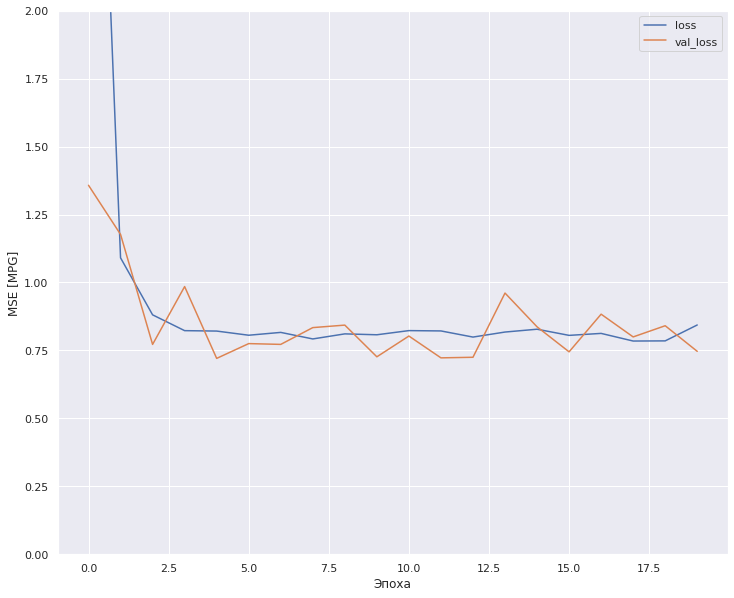

In [ ]:
plot_loss(history)

In [ ]:
X_test

Угол нашивки, град  Шаг нашивки  Плотность нашивки  Плотность, кг/м3  \
900                90.0     6.313201          58.261074       2038.289409   
570                90.0     9.057567          68.253199       1945.934610   
791                90.0     4.976887          67.110068       1952.857390   
189                 0.0     2.438243          53.971899       2056.616323   
372                 0.0    12.452169          44.471612       2002.618092   
..                  ...          ...                ...               ...   
66                  0.0     9.903090          45.319430       1986.552440   
395                 0.0     7.927846          37.327435       1918.505388   
355                 0.0    10.110722          80.918147       2003.317070   
277                 0.0     8.606411          39.452706       1983.145504   
604                90.0     9.252672          57.881818       1977.112680   

     модуль упругости, ГПа  Количество отвердителя, м.%  \
900             767.897075                    83.191553   
570             113.938512                    63.526815   
791             304.058314                   105.938449   
189            1546.290886                   126.109863   
372            1049.406341                   109.907757   
..                     ...                          ...   
66              818.135194                   102.614962   
395             923.222626                   102.856973   
355             890.888308                   154.966325   
277             950.679512                    61.074494   
604             764.162859                   118.701288   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
900                        25.627620                249.612303   
570                        21.616401                296.373995   
791                        24.791859                318.140519   
189                        21.950931                270.407471   
372                        24.090622                325.877073   
..                               ...                       ...   
66                         17.751531                256.335930   
395                        21.778325                304.152923   
355                        24.461730                307.797291   
277                        22.922922                278.850418   
604                        19.545169                288.919534   

     Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
900                     774.578473                             71.279418   
570                     807.273814                             75.990895   
791                     386.789237                             72.221529   
189                     633.390973                             71.337572   
372                     298.267629                             74.602395   
..                             ...                                   ...   
66                      414.212655                             72.513747   
395                      99.372553                             76.666930   
355                     573.015309                             71.927507   
277                     955.745380                             69.748799   
604                     521.682903                             74.928247   

     Прочность при растяжении, МПа  Потребление смолы, г/м2  
900                    2768.839085               266.956745  
570                    2975.643321               243.055823  
791                    2640.186903                84.490129  
189                    2811.005983               200.116156  
372                    2564.521373               145.763464  
..                             ...                      ...  
66                     2427.726923               277.746898  
395                    2821.643613               189.650866  
355                    2570.365126               232.183847  
277                    2851.631846           

In [ ]:
y_test.head(10)

900    1.580433
570    2.147426
791    0.927841
189    1.719814
372    2.717223
191    3.353747
643    2.546782
474    2.579047
65     2.041352
890    3.322189
Name: Соотношение матрица-наполнитель, dtype: float64

In [ ]:
len(y_test)

276

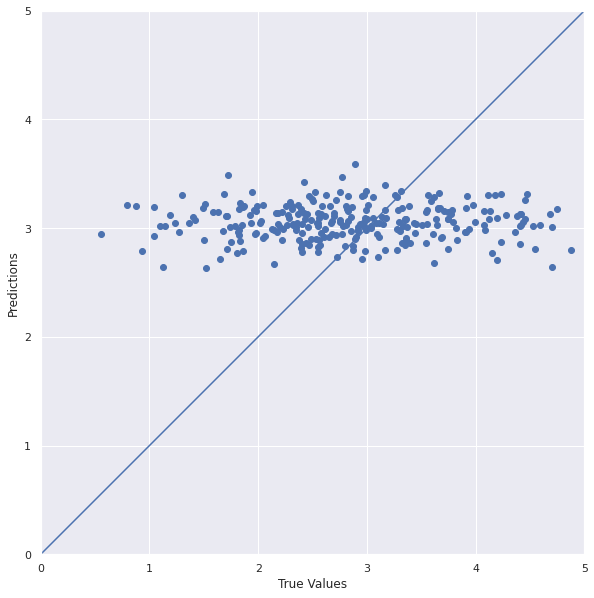

In [ ]:
test_predictions = dnn_goal_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_predictions

array([3.1450937, 2.6656847, 2.7872226, 3.4873679, 3.2617548, 2.8475716,
       2.8232408, 3.1296785, 2.9138901, 2.8616402, 3.0934768, 3.0199869,
       3.1249979, 2.7994847, 3.1279674, 3.1153042, 3.0495226, 3.178183 ,
       2.963733 , 3.182555 , 3.092797 , 3.1542928, 3.0294774, 3.2915742,
       3.0153365, 3.0451286, 2.7175865, 2.8481064, 2.793903 , 3.0332963,
       3.2884455, 3.042384 , 3.155766 , 2.892606 , 3.3305814, 2.9606316,
       3.1289122, 3.3459985, 2.949632 , 2.9650996, 2.9738343, 2.9377027,
       3.2966526, 3.088096 , 3.202749 , 2.9872034, 3.0251343, 2.9534352,
       3.2013407, 3.0481036, 3.1909127, 2.811812 , 3.0899086, 3.08015  ,
       2.9436436, 2.9639304, 2.9813678, 3.083789 , 3.015509 , 2.884641 ,
       3.1622221, 3.0608542, 2.978955 , 2.9158494, 3.0414474, 2.6431782,
       3.1467588, 3.0687358, 3.0154626, 2.8463607, 2.944112 , 2.9850864,
       3.166351 , 3.1072016, 2.9937172, 2.9693792, 3.0360925, 2.891553 ,
       3.110979 , 3.1685529, 3.4728909, 3.2475655, 

In [ ]:
len(test_predictions)

276

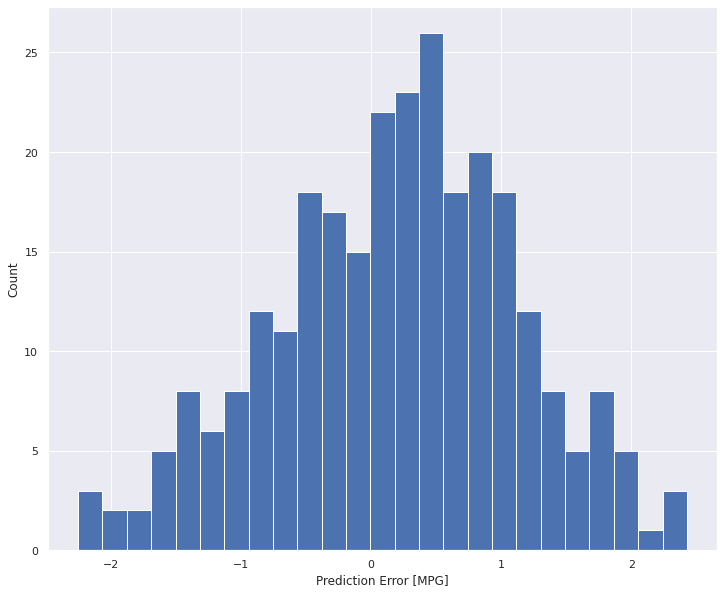

In [ ]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

# Сохранение модели

In [ ]:
import pickle
lr = LinearRegression()
pickle.dump(lr, open('lr_model.pkl', 'wb'))

In [ ]:
model_load = pickle.load(open('/content/lr_model.pkl', 'rb'))